In [2]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import scipy.io
import pandas as pd
from skimage import color
from skimage import io
from skimage.transform import radon, iradon, iradon_sart, rescale
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio
import math
import cv2
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
ctScans = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/ctscan_hw1.mat')
ctMasks = scipy.io.loadmat('/content/drive/My Drive/CCE-AIMIA/infmsk_hw1.mat')

In [4]:
(ms,ns,cs)= (ctScans['ctscan']).shape
(mm,nm,cm)= (ctMasks['infmsk']).shape
print((ms,ns,cs))
print((mm,nm,cm))

(512, 512, 3554)
(512, 512, 3554)


In [5]:
ctscansarray = []
ctmasksarray = []
for i in range(cm):
    ctscansarray.append((ctScans['ctscan'][:,:,i]))
    ctmasksarray.append((ctMasks['infmsk'][:,:,i]))

In [6]:
image = ctscansarray[3514]
image.shape

(512, 512)

In [7]:

class CT:

	def __init__(self, image, max_angle, filter_name):
		"""
		Parameter: input CT slice, max_angle=180 deg, filter_name for Filterback Projection
		"""
		self.image = image
		self.max_angle = max_angle
		self.filter = filter_name

	def process_image(self):
		"""Scale the image and calculate the numbers of projection"""

		image_scaled = rescale(self.image, scale=1, mode='reflect', multichannel=False)
		theta = np.linspace(0.0, self.max_angle, num = 45) # num =45/23 for 4X and 23 for 8X
		num_projection = len(theta)*max(image_scaled.shape)
		
		return image_scaled, theta, num_projection

	def radon_transform(self):
		"""Calculate sinogram using radon transformation"""

		img, theta, __ = self.process_image()
		sinogram = radon(img, theta=theta)

		return sinogram


	def filtered_back_projection(self):
		"""Back projection to reconstruct image from sinogram"""

		__, theta, __ = self.process_image()
		sinogram = self.radon_transform()

		reconstruction = iradon(sinogram, theta=theta, filter_name=self.filter)

		return reconstruction

In [ ]:
sinogram120 = []
reconstructedCT_FBP120 = []
reconstructedCT_SART120 = []
ClassData = []
max_angle = 120
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram120.append(ClassData[i].radon_transform())
  reconstructedCT_FBP120.append(ClassData[i].filtered_back_projection())
  #reconstructedCT_SART.append(ClassData[i].sart())

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


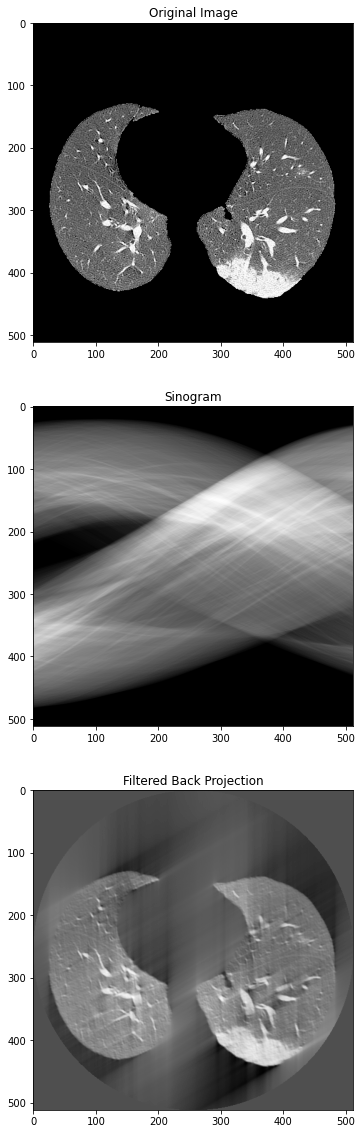

In [ ]:
# with max_angle = 120 deg.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[600], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram120[600], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP120[600], cmap=plt.cm.Greys_r)

In [ ]:
PSNR =[]
SSIM = []
for i in range(len(reconstructedCT_FBP120)):
  PSNR.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP120[i]))
  SSIM.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP120[i], multichannel=False))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


In [ ]:
print(PSNR[600])
print(SSIM[600])

12.42797968024357
0.6532645623728417


In [ ]:
sinogram180 = []
reconstructedCT_FBP180 = []
reconstructedCT_SART180 = []
ClassData180 = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
for i in range(len(ctscansarray)):
  ClassData180.append(CT(ctscansarray[i],max_angle,filter_used))
for i in range(len(ctscansarray)):
  sinogram180.append(ClassData180[i].radon_transform())
  reconstructedCT_FBP180.append(ClassData180[i].filtered_back_projection())
  #reconstructedCT_SART.append(ClassData[i].sart())

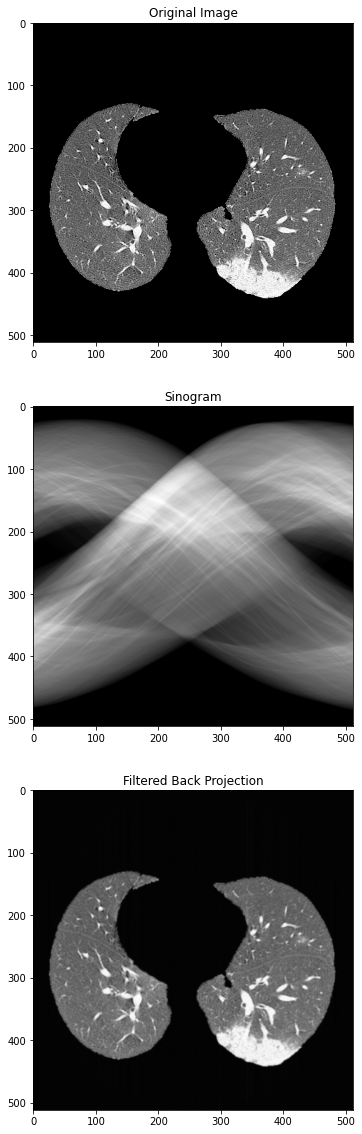

In [ ]:
# with max_angle = 180 deg.
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[600], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram180[600], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP180[600], cmap=plt.cm.Greys_r)

In [ ]:
PSNR =[]
SSIM = []
for i in range(len(reconstructedCT_FBP180)):
  PSNR.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP180[i]))
  SSIM.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP180[i], multichannel=False))
print(PSNR[600])
print(SSIM[600])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


12.427041971001028
0.6544412051594269


In [46]:
sinogram4x = []
reconstructedCT_FBP4x = []
reconstructedCT_SART4x = []
ClassData4x = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
#for i in range(len(ctscansarray)):
for i in range(3000, 3020, 1):
  ClassData4x.append(CT(ctscansarray[i],max_angle,filter_used))
#for i in range(len(ctscansarray)):
for i in range(0, 20, 1):
  sinogram4x.append(ClassData4x[i].radon_transform())
  reconstructedCT_FBP4x.append(ClassData4x[i].filtered_back_projection())

/usr/local/lib/python3.7/dist-packages/skimage/transform/radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


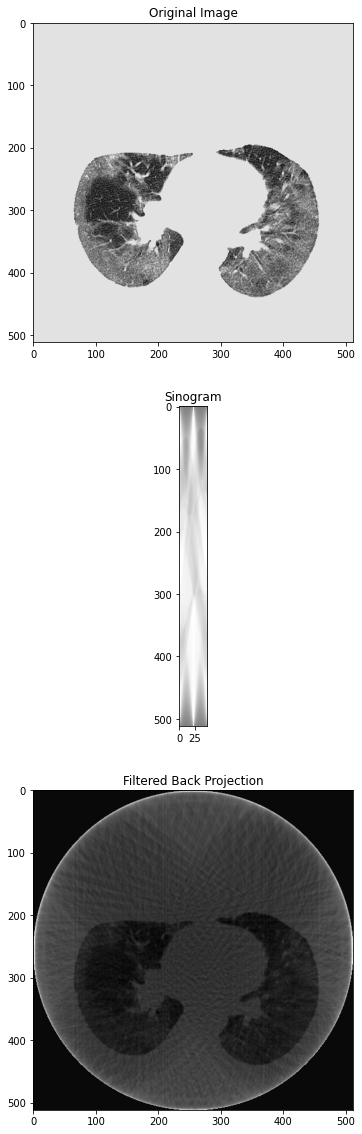

In [9]:
# with max_angle = 180 deg./4x
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[3514], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram4x[3514], cmap=plt.cm.Greys_r)
#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP4x[3514], cmap=plt.cm.Greys_r)

In [ ]:
PSNR4x =[]
SSIM4x = []
for i in range(len(reconstructedCT_FBP4x)):
  PSNR4x.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP4x[i]))
  SSIM4x.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP4x[i], multichannel=False))

print(PSNR4x[18])
print(SSIM4x[18])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


1.1572833216310467
0.006905215881176878


In [ ]:
avg_PSNR4x = [0]
avg_SSIM4x = [0]
Sum_PSNR4x = [0]
Sum_SSIM4x = [0]
for i in range(len(reconstructedCT_FBP4x)):
  Sum_PSNR4x += PSNR4x[i]
  Sum_SSIM4x += SSIM4x[i]

avg_PSNR4x = (Sum_PSNR4x/(len(PSNR4x)))
avg_SSIM4x = (Sum_SSIM4x/len(SSIM4x))
print(avg_PSNR4x)
print(avg_SSIM4x)

[6.0560631]
[0.16157094]


In [52]:
sinogram8x = []
reconstructedCT_FBP8x = []
reconstructedCT_SART8x = []
ClassData8x = []
max_angle = 180
# filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']
filter_used = "hann"
#for i in range(len(ctscansarray)):
for i in range(3000, 3020, 1):
  ClassData8x.append(CT(ctscansarray[i],max_angle,filter_used))
#for i in range(len(ctscansarray)):
for i in range(0,20,1):
  sinogram8x.append(ClassData8x[i].radon_transform())
  reconstructedCT_FBP8x.append(ClassData8x[i].filtered_back_projection())

In [ ]:
len(reconstructedCT_FBP8x)

3554

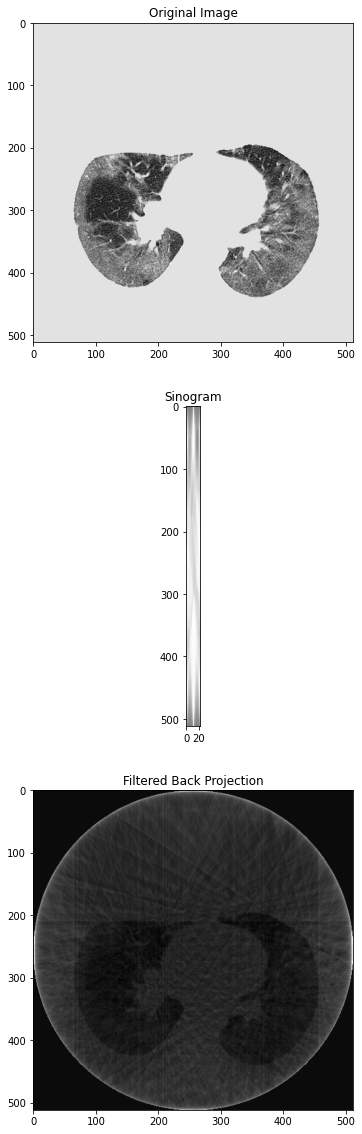

In [ ]:
# with max_angle = 180 deg./8x
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(20, 20))
#Plot original image
ax1.set_title("Original Image")
ax1.imshow(ctscansarray[3514], cmap=plt.cm.Greys_r)

#Plot sinogram
ax2.set_title("Sinogram")
ax2.imshow(sinogram8x[3514], cmap=plt.cm.Greys_r)

#Plot reconstructed image
ax3.set_title("Filtered Back Projection")
ax3.imshow(reconstructedCT_FBP8x[3514], cmap=plt.cm.Greys_r)

In [ ]:
PSNR8x =[]
SSIM8x = []
for i in range(len(reconstructedCT_FBP8x)):
  PSNR8x.append(peak_signal_noise_ratio(ctscansarray[i], reconstructedCT_FBP8x[i]))
  SSIM8x.append(structural_similarity(ctscansarray[i], reconstructedCT_FBP8x[i], multichannel=False))

print(PSNR8x[18])
print(SSIM8x[18])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  """


1.157388302874974
0.006905382744454827


In [ ]:
avg_PSNR8x = [0]
avg_SSIM8x = [0]
Sum_PSNR8x = [0]
Sum_SSIM8x = [0]
for i in range(len(reconstructedCT_FBP8x)):
  Sum_PSNR8x += PSNR8x[i]
  Sum_SSIM8x += SSIM8x[i]

avg_PSNR8x = (Sum_PSNR8x/(len(PSNR8x)))
avg_SSIM8x = (Sum_SSIM8x/len(SSIM8x))
print(avg_PSNR8x)
print(avg_SSIM8x)

[6.05618027]
[0.16150934]


In [54]:
kmeansSeg_image4x = []
labels_reshaped4x = []
k = 3 # number of clusters (K)
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
#for i in range(len(reconstructedCT_FBP4x)):
for i in range(len(reconstructedCT_FBP8x)):
  # reshape the image to a 2D array of pixels
  #image = reconstructedCT_FBP4x[i]
  image = reconstructedCT_FBP8x[i]
  ct_pixel_values = image.reshape(-1,1)
  # convert to float
  ct_pixel_values = np.float32(ct_pixel_values)
  #print(ct_pixel_values.shape)
  _, labels, (centers) = cv2.kmeans(ct_pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # convert back to 8 bit values
  centers = np.uint8(centers)
  # flatten the labels array
  labels = labels.flatten()
  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]
  # reshape back to the original image dimension
  segmented = segmented_image.reshape(image.shape)
  kmeansSeg_image4x.append(segmented)
  labels_reshaped4x.append(labels.reshape(512,512))

In [48]:
len(kmeansSeg_image4x)

20

In [55]:
tp = 0
tn = 0
fn = 0
fp = 0
ctmasksarrayBatch = []
ctmasksarrayBatch = ctmasksarray[3000:3020]
Sensitivity4x = []
Specificity4x = []
Accuracy4x = []
Dice_score4x = []
(rows, columns) = (512, 512)
#for m in range(len(reconstructedCT_FBP4x)):
for m in range(len(reconstructedCT_FBP8x)):
	ground_truth = ctmasksarrayBatch[m]
	KsegLabels = labels_reshaped4x[m]
	for i in range(rows):
		for j in range(columns):
			if ground_truth[i][j] == 1 and KsegLabels[i][j] == 0:
				tp = tp + 1
			if ground_truth[i][j] == 2 and KsegLabels[i][j] == 2:
				tn = tn + 1
			if ground_truth[i][j] == 1 and KsegLabels[i][j] == 2:
				fn = fn + 1
			if ground_truth[i][j] == 2 and KsegLabels[i][j] == 0:
				fp = fp + 1

	try:
		TPR = float(tp)/(tp+fn)
		Sensitivity4x.append(TPR)
		FPR = float(tn)/(tn+fp)
		Specificity4x.append(FPR)
		Acc = ((tp+tn)/(tp+tn+fn+fp))*100
		Accuracy4x.append(Acc)
		dice = float(2*tp)/((2*tp)+fp+fn)
		Dice_score4x.append(dice)
	except ZeroDivisionError:
		TPR=0

In [64]:
Sum_Sensitivity4x=0
Sum_Specificty4x=0
Sum_Accuracy4x=0
Sum_Dice_score4x=0
print ('\n************Average Accuracy, Sensitivity, Specificity, Avg Dice_Socre********')

for i in range(len(Sensitivity4x)):
  Sum_Sensitivity4x+=Sensitivity4x[i]
  Sum_Specificty4x+=Specificity4x[i]
  Sum_Accuracy4x+=Accuracy4x[i]
  Sum_Dice_score4x+=Dice_score4x[i]

Avg_sensitivity = Sum_Sensitivity4x/len(Sensitivity4x)
print("\nAverage Sensitivity is:",Avg_sensitivity)
Avg_Specificity = Sum_Specificty4x/len(Specificity4x)
print("\nAverage Specificity is:", Avg_Specificity)
Avg_Accuracy = Sum_Accuracy4x/len(Accuracy4x)
print("\nAverage Accuracy(%):",Avg_Accuracy)
Avg_Dice_score = Sum_Dice_score4x/len(Dice_score4x)
print("\nAverage Dice_score:",Avg_Dice_score)


************Average Accuracy, Sensitivity, Specificity, Avg Dice_Socre********

Average Sensitivity is: 0.2679735396720146

Average Specificity is: 0.6555515364059492

Average Accuracy(%): 64.09300681599676

Average Dice_score: 0.06877999729029094



************Ctslice, k-means segmentation, infection mask**********


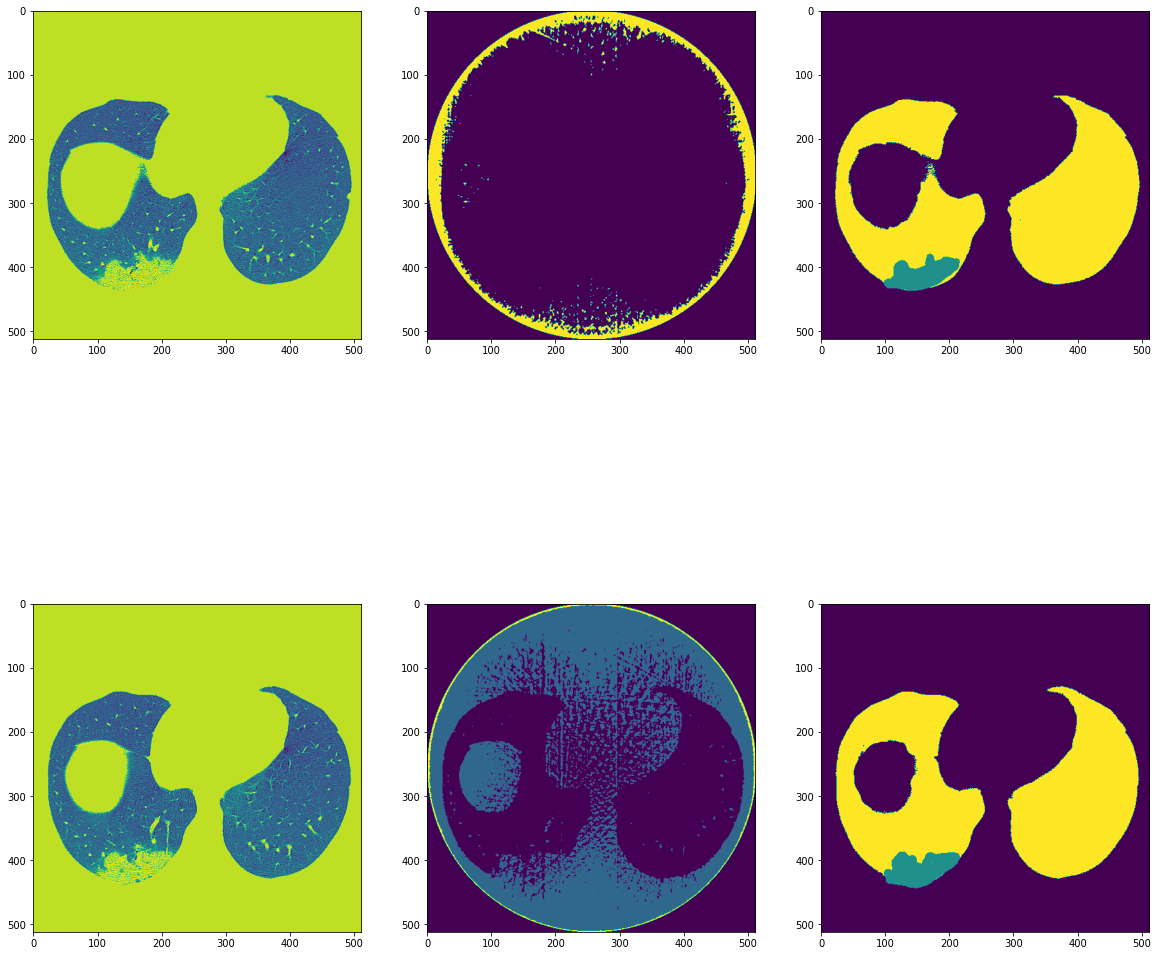

In [51]:
ctscansarrayBatch = ctscansarray[3000:3020]
print ('\n************Ctslice, k-means segmentation, infection mask**********')
num1 = np.random.randint(0, len(reconstructedCT_FBP4x))
num2 = np.random.randint(0, len(reconstructedCT_FBP4x))
# show the image
fig, (ax1,ax2) = plt.subplots(2, 3,figsize=(20, 20))
ax1[0].imshow(ctscansarrayBatch[num1])
ax1[1].imshow(kmeansSeg_image4x[num1])
ax1[2].imshow((ctmasksarrayBatch[num1]))
ax2[0].imshow(ctscansarrayBatch[num2])
ax2[1].imshow(kmeansSeg_image4x[num2])
ax2[2].imshow((ctmasksarrayBatch[num2]))


************Ctslice, k-means segmentation, infection mask**********


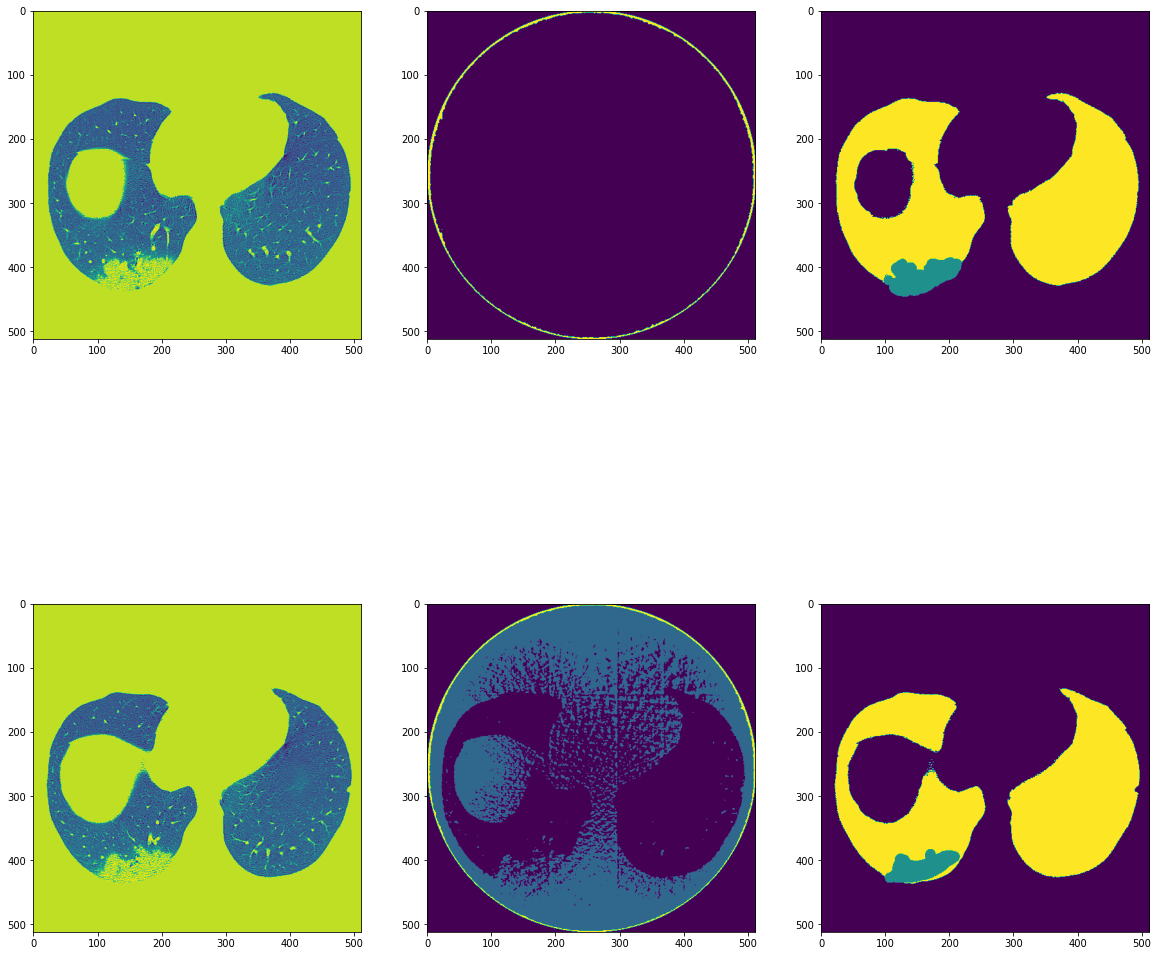

In [63]:
#8x plots
ctscansarrayBatch = ctscansarray[3000:3020]
print ('\n************Ctslice, k-means segmentation, infection mask**********')
num1 = np.random.randint(0, len(reconstructedCT_FBP8x))
num2 = np.random.randint(0, len(reconstructedCT_FBP8x))
# show the image
fig, (ax1,ax2) = plt.subplots(2, 3,figsize=(20, 20))
ax1[0].imshow(ctscansarrayBatch[num1])
ax1[1].imshow(kmeansSeg_image4x[num1])
ax1[2].imshow((ctmasksarrayBatch[num1]))
ax2[0].imshow(ctscansarrayBatch[num2])
ax2[1].imshow(kmeansSeg_image4x[num2])
ax2[2].imshow((ctmasksarrayBatch[num2]))